# Linear regression Multiple and Polynomiale Numpy

In [44]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Polynomiale Regression : 1 variable $x_1$

## 1.1 Dataset

To develop a polynomial model from the equations of Linear Regression, it is enough to add polynomial degrees in the columns of the matrix $X$, as well as an equal number of rows in the vector $\theta$.

In this notebook, we will develop a polynomial of degree 2: $f(x) = ax^2 + bx + c$. For this, we need to construct the following matrices:

$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ ... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : the vector $y$ remains the same as in Linear Regression*

In [45]:
# Fix the random seed so results are reproducible
np.random.seed(0)

# Generate a synthetic dataset with 1 feature
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# Modify target values to make the dataset non-linear
y = y + abs(y / 2)



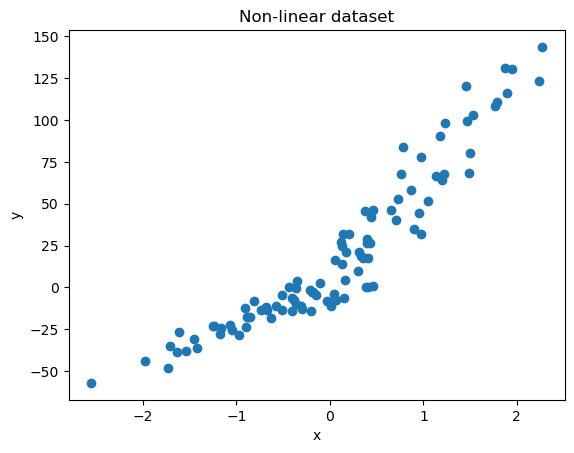

In [46]:
# Visualize the dataset
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-linear dataset")
plt.show()



In [47]:
# Check dimensions
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (100, 1)
y shape: (100,)


In [48]:
# Reshape y into a column vector
y = y.reshape(y.shape[0], 1)
print("reshaped y:", y.shape)

reshaped y: (100, 1)


In [49]:
# Build the design matrix X
# Includes: quadratic term x^2, linear term x, and bias term 1
X = np.hstack((x**2, x, np.ones(x.shape)))

print("X shape:", X.shape)
print("First 10 rows of X:\n", X[:10])

X shape: (100, 3)
First 10 rows of X:
 [[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [50]:
# Initialize parameter vector theta randomly (3 coefficients: for x^2, x, and bias)
theta = np.random.randn(3, 1)
print("Initial theta:\n", theta)

Initial theta:
 [[-0.63743703]
 [-0.39727181]
 [-0.13288058]]


## 1.2 Linear Model 
We implement a model $F = X.\theta$, then we test the model to make sure there are no bugs (a good practice). Moreover, this allows us to see what the initial model looks like, defined by the values of $\theta$.

In [51]:
# ----- Model and Cost -----

# Hypothesis function
def model(X, theta):
    return X.dot(theta)

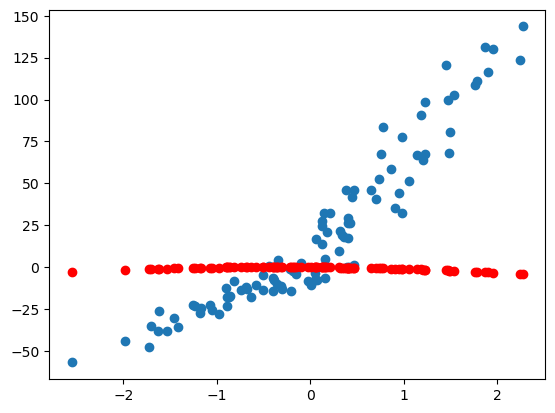

In [52]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

## 1.3 Cost Function: Mean Squared Error
We measure the model’s errors on the dataset $(X, y)$ by implementing the Mean Squared Error (MSE).

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Then, we test our function to make sure there are no bugs.

In [53]:
# Mean Squared Error cost function
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [54]:
cost_function(X, y, theta)

1328.6654828872622

## 1.4 Gradients and Gradient Descent
We implement the formula of the Gradient for the MSE:

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Then, we use this function in the Gradient Descent algorithm:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [55]:
# Gradient computation
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [56]:

# Gradient Descent algorithm
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)  # to store cost at each iteration
    
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)  # update parameters
        cost_history[i] = cost_function(X, y, theta)       # record cost
    
    return theta, cost_history


## 1.5 Training Phase

We define a **number of iterations**, as well as a **learning rate $\alpha$**, and off we go!

Once the model is trained, we observe the results with respect to our dataset.

In [57]:
# ----- Training -----
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print("Final theta after training:\n", theta_final)

Final theta after training:
 [[ 8.60077615]
 [42.23116732]
 [ 8.18143081]]


In [58]:
# Predictions
predictions = model(X, theta_final)

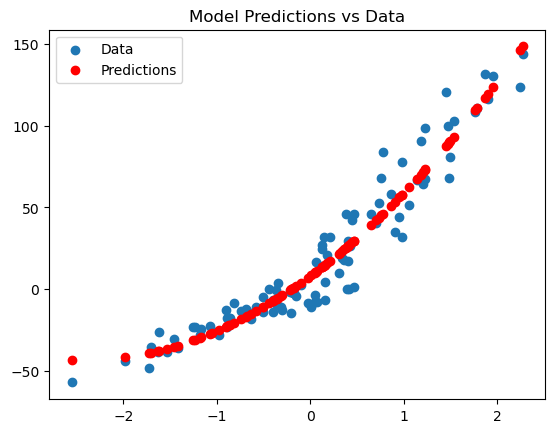

In [59]:
# Visualize results
plt.scatter(x, y, label="Data")
plt.scatter(x, predictions, c='r', label="Predictions")
plt.legend()
plt.title("Model Predictions vs Data")
plt.show()

## 1.6 Learning Curves

To check whether our Gradient Descent algorithm has worked properly, we observe the evolution of the cost function across the iterations.

We should obtain a curve that decreases with each iteration until it stabilizes at a minimal level (close to zero).

If the curve does not follow this pattern, it usually means that the **learning rate** is too high, and we should choose a smaller step size.

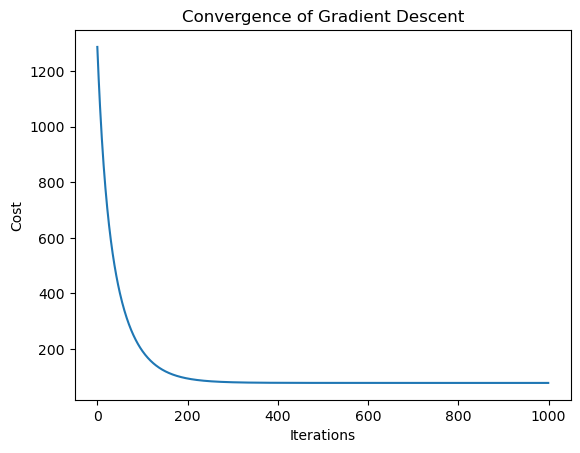

In [60]:
# Plot cost function convergence
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Gradient Descent")
plt.show()

## 1.7 Final Evaluation

To assess the real performance of our model with a widely used metric (useful for your boss, client, or colleagues), we can use the coefficient of determination, also known as $R^2$.

This metric comes from the method of least squares. The closer the result is to 1, the better the model fits the data.

In [61]:
# R² Score (Coefficient of Determination)
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

print("R² score:", coef_determination(y, predictions))

R² score: 0.9287186469389942


# 2. Multiple Variable Regression

This is when we integrate several variables $x_1, x_2, x_3, \dots$ into our model that things really start to become interesting. It’s also perhaps at this point that people sometimes start talking about artificial intelligence, because it becomes difficult for a human being to imagine in their mind a model with multiple dimensions (we only live in a 3D space). People then assume that the machine, on the other hand, is able to represent these spaces because it finds the best model (using Gradient Descent), and therefore some say it is intelligent—while in reality, it’s just mathematics.

## 2.1 Dataset

In this notebook, we will build a model with 2 variables, $x_1, x_2$.
To do this, we simply inject the different variables $x_1, x_2$ (the features in English) into the matrix $X$, and create the vector $\theta$ that aligns with:

$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : the vector $y$ remains the same as in Linear Regression.*


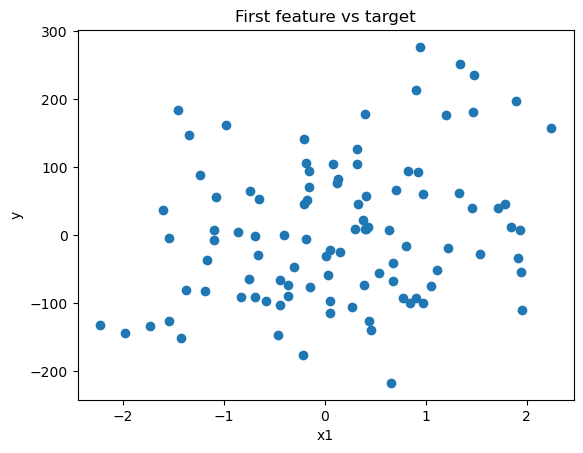

In [62]:
# ---------------------------------------------------------
#   EXTENSION TO MULTIPLE LINEAR REGRESSION (2 features)
# ---------------------------------------------------------

np.random.seed(0)

# Generate dataset with 2 features
x, y = make_regression(n_samples=100, n_features=2, noise=10)

# Scatter plot (x1 vs y)
plt.scatter(x[:,0], y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("First feature vs target")
plt.show()

This dataset contains only two variables, $x_1$ and $x_2$, so it can be visualized in a 3D space. As you can see, this model can be represented by a surface. By the way, this surface is flat because make_regression returns us linear data. If we want to create a non-flat surface, we just need to modify the value of $y$, as we did at the beginning of this notebook. (We won’t do that here.)

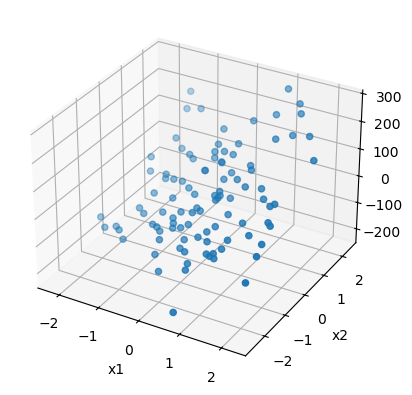

In [63]:
# 3D visualization of x1, x2, and y
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

In [64]:
# Reshape y into column vector
y = y.reshape(y.shape[0], 1)

# Build design matrix X (x1, x2, bias)
X = np.hstack((x, np.ones((x.shape[0], 1))))
print("X shape:", X.shape)
print("First 10 rows of X:\n", X[:10])

X shape: (100, 3)
First 10 rows of X:
 [[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [65]:
# Initialize theta randomly (3 parameters)
theta = np.random.randn(3, 1)

# Train the model
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print("Final theta (2 features):\n", theta_final)

Final theta (2 features):
 [[28.67154616]
 [97.29524926]
 [-0.511481  ]]


In [66]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [67]:
# Predictions = model(X, theta_final)

predictions = model(X, theta_final)

theta_final

array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

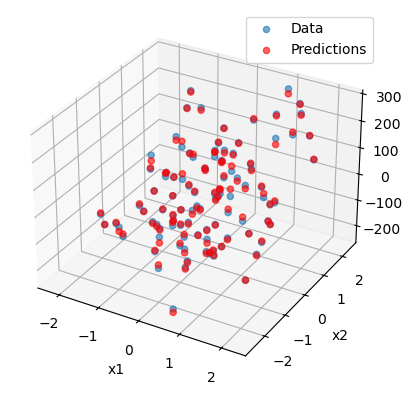

In [68]:
# 3D visualization with predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y.ravel(), label="Data", alpha=0.6)
ax.scatter(x[:,0], x[:,1], predictions.ravel(), label="Predictions", c='r', alpha=0.6)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.legend()
plt.show()


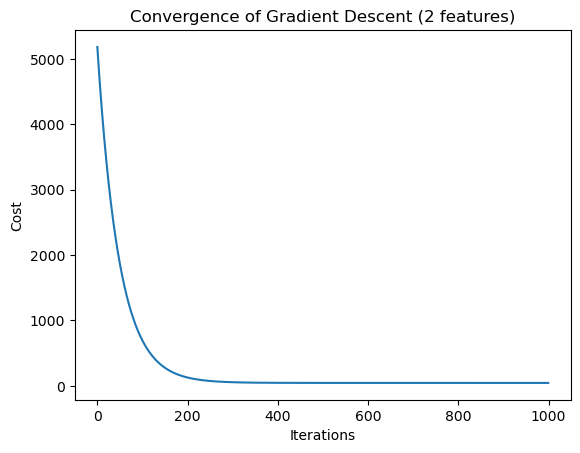

In [32]:
# Plot cost function convergence
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Gradient Descent (2 features)")
plt.show()

In [33]:
# 1.7 final Evaluation 
print("R² score (2 features):", coef_determination(y, predictions))

R² score (2 features): 0.9916687122277607
